In [1]:
!pip install faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 30.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import sklearn as sk


In [3]:
num_points=[int(1e3),int(1e4),int(1e6)]
num_dims=[32,64,128]
num_leaf=[40,80,120]


In [4]:
import faiss

In [5]:
import time
from sklearn.neighbors import KDTree

query_data=list()
build_data=list()
leaf_data=list()
dims_data=list()
points_data=list()
for n in num_points:
    for d in num_dims:
        for j in num_leaf:
            X=np.random.random((n,d))
            query=np.random.random(d)
            t1=time.time()
            tree = KDTree(X, leaf_size=j)
            t2=time.time()
            build_data.append(t2-t1)
            t3=time.time()
            t4=time.time()
            ind = tree.query(query.reshape(1,-1), k=1,return_distance=False,dualtree=True)
            t5=time.time()
            query_data.append(t5-t4)
            dims_data.append(d)
            points_data.append(n)
            leaf_data.append(j)



In [6]:
len(points_data)

27

In [7]:
import pandas as pd

In [8]:
df=pd.DataFrame({'build':build_data,'query':query_data,'dims':dims_data,
                 'points':points_data,'leaf_size':leaf_data})

In [39]:
df.tail()

,build,query,dims,points,leaf_size
22,22.376747,0.252245,64,1000000,80
23,22.006547,0.255820,64,1000000,120
24,45.193096,0.380568,128,1000000,40
25,44.062520,0.353822,128,1000000,80
26,43.518903,0.428602,128,1000000,120


In [11]:
df_group=df.groupby(['dims','points','leaf_size']).mean()

In [21]:
df_group=df_group.reset_index()

In [22]:
df_group.loc[df_group['leaf_size']==40]

,dims,points,leaf_size,build,query
0,32,1000,40,0.002259,0.000468
3,32,10000,40,0.032775,0.002045
6,32,1000000,40,11.948927,0.158898
9,64,1000,40,0.003582,0.000420
12,64,10000,40,0.067016,0.002602
15,64,1000000,40,23.740628,0.285083
18,128,1000,40,0.007041,0.000706
21,128,10000,40,0.141034,0.004096
24,128,1000000,40,45.193096,0.380568


Text(0.5, 1.0, 'KD Tree leaf_size=40')

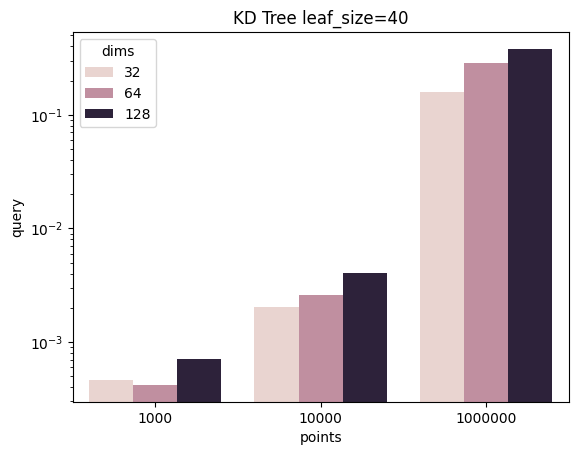

In [35]:
import seaborn as sns

g=sns.barplot(
    x="points", y="query",
    data=df_group.loc[df_group['leaf_size']==40], hue="dims"
)
g.set_yscale("log")
g.set_title("KD Tree leaf_size=40")

Text(0.5, 1.0, 'KD Tree leaf_size=80')

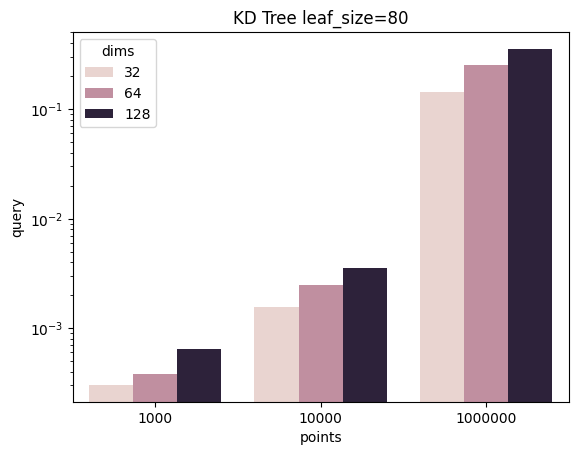

In [33]:
g=sns.barplot(
    x="points", y="query",
    data=df_group.loc[df_group['leaf_size']==80], hue="dims"
)
g.set_yscale("log")
g.set_title("KD Tree leaf_size=80")

Text(0.5, 1.0, 'KD Tree leaf_size=120')

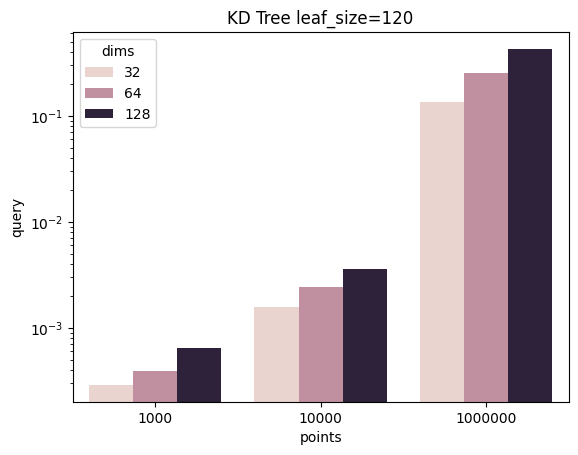

In [34]:
g=sns.barplot(
    x="points", y="query",
    data=df_group.loc[df_group['leaf_size']==120], hue="dims"
)
g.set_yscale("log")
g.set_title("KD Tree leaf_size=120")

In [ ]:
import faiss

In [36]:
import time

query_data=list()
build_data=list()
leaf_data=list()
dims_data=list()
points_data=list()
for n in num_points:
    for d in num_dims:
        X=np.random.random((n,d))
        query=np.random.random(d)
        t1=time.time()
        index = faiss.IndexFlatL2(d)
        index.add(X)
        t2=time.time()
        build_data.append(t2-t1)
        t3=time.time()
        t4=time.time()
        D, I = index.search(query.reshape(1,-1), k=1)
        t5=time.time()
        query_data.append(t5-t4)
        dims_data.append(d)
        points_data.append(n)

In [37]:
import pandas as pd

df_faiss=pd.DataFrame({'build':build_data,'query':query_data,'dims':dims_data,
                 'points':points_data})

In [40]:
df_faiss_group=df_faiss.groupby(['dims','points']).mean().reset_index()

Text(0.5, 1.0, 'FAISS Index Flat 2D')

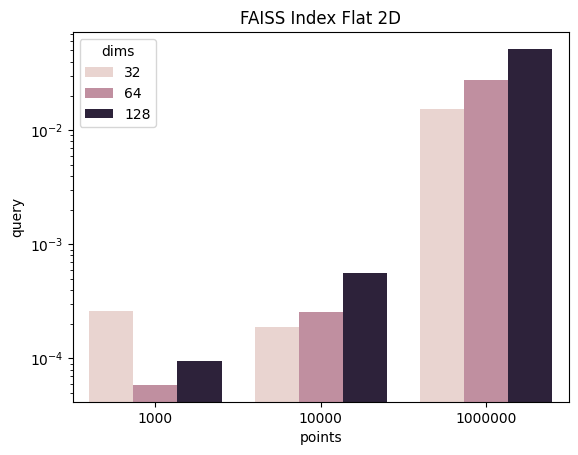

In [41]:
g=sns.barplot(
    x="points", y="query",
    data=df_faiss_group, hue="dims"
)
g.set_yscale("log")
g.set_title("FAISS Index Flat 2D")